# Classification algorithm

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import os 
import tarfile
import urllib 
import pandas as pd
import seaborn as sns
# Use pandas to retrieve data file
url = 'https://raw.githubusercontent.com/danny-cohen/uw-cancer-ml/master/data.csv'
cancerdf = pd.read_csv(url,index_col=0)

In [2]:
cancerdf.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [3]:
# make copy of original dataset
cancerdf.info()
cancer = cancerdf.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [4]:
# convert the string label diagnosis ('M' or 'B') into boolean 1s and 0s
cancer['diagnosis']=(cancer['diagnosis']=='M').astype(np.int)
print("Percent of patients with malignant diagnosis",float(cancer.diagnosis.sum())/cancer.diagnosis.size)

Percent of patients with malignant diagnosis 0.37258347978910367


# Create a training and test set, perform feature scaling/data preparation

In [5]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn.base import clone 

train_set, test_set = train_test_split(cancer, test_size=0.2, random_state=42)
#train_set, test_test = StratifiedShuffleSplit(df, test_size=0.25, random_state=42)
#split = StratifiedShuffleSplit ( n_splits = 1 , test_size = 0.2 , random_state = 42 ) 
#for train_index , test_index in split . split ( cancer , cancer [ "" ]): 


X_train = train_set.drop("diagnosis",axis=1).loc[:,"radius_mean":"fractal_dimension_worst"]#iloc[[:,:-1] 
y_train = train_set['diagnosis'].copy()
X_test = test_set.drop("diagnosis",axis=1).loc[:,"radius_mean":"fractal_dimension_worst"] #iloc[[:,:-1] 
y_test = test_set['diagnosis'].copy()

# features=train_set.drop("diagnosis",axis=1).iloc[:,:-1] # predictors (features)
# features.info()
# target=train_set['diagnosis'].copy()   # labels, target feature
#print(target)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 859471 to 862965
Data columns (total 30 columns):
radius_mean                455 non-null float64
texture_mean               455 non-null float64
perimeter_mean             455 non-null float64
area_mean                  455 non-null float64
smoothness_mean            455 non-null float64
compactness_mean           455 non-null float64
concavity_mean             455 non-null float64
concave points_mean        455 non-null float64
symmetry_mean              455 non-null float64
fractal_dimension_mean     455 non-null float64
radius_se                  455 non-null float64
texture_se                 455 non-null float64
perimeter_se               455 non-null float64
area_se                    455 non-null float64
smoothness_se              455 non-null float64
compactness_se             455 non-null float64
concavity_se               455 non-null float64
concave points_se          455 non-null float64
symmetry_se            

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

# Clean data from NaNs, Inf, etc

In [7]:
# import seaborn as sns
# %pylab
# #fig=plt.figure(figsize=(15,20)
# fig,axs=plt.subplots(6,5,figsize=(10,5))
# #print("NUM FEATURES: ",np.size(features.keys()))
# c=0

# for j in range(axs.shape[0]):
#     for k in range(axs.shape[1]):
        
# #         f = X_train[:,c]
# #         fmed=np.nanmedian(f)
# #         fstd=np.nanstd(f)
# #         print(fmed-fstd,fmed+fstd)
# #         f[np.isnan(f)]=-1.0e5
#         #sns.distplot(features.iloc[:,c],bins=20,ax=axs[j,k])
#         axs[j,k].hist(X_train.iloc[:,c],bins=30)
#         axs[j,k].annotate(X_train.keys()[c],xy=(0.4,0.8),xycoords="axes fraction")
#         c+=1
        
#         if c==np.size(features.keys())-1:
#             break
  

## Train the classifier

#### First try stochastic gradient descent class

In [8]:

from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(alpha=0.001,tol=0.001,random_state=42,shuffle=True, loss='modified_huber')
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
#from sklearn.svm import SVC
#svclf = SVC(C=1.0e3,max_iter=1000,random_state=42,tol=0.001,gamma='auto')
#svclf.fit(X_train.copy(), y_train.copy())

# Predictions and Cross-evaluation using test set

In [10]:
from sklearn.model_selection import cross_val_score 

cross_val_score ( sgd_clf , X_train , y_train , cv = 3 , scoring = "accuracy" ) 

array([0.86928105, 0.91390728, 0.84768212])

In [11]:
#cross_val_score ( svclf , X_train , y_train, cv=3, scoring = 'accuracy')
#print(cross_val_score_svc)

In [12]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict ( sgd_clf , X_train , y_train , cv = 3 ,verbose=0) 
#y_train_pred_svc = cross_val_predict ( svclf , X_train , y_train , cv = 3 ,verbose=0) 


## Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix 
confusion_matrix ( y_train , y_train_pred ) 

array([[262,  24],
       [ 32, 137]])

## Precision, Recall, ROC curve for SGD vs SVC classifiers

In [14]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("--- SGD CLASSIFIER ---")
print("PRECISION",precision_score( y_train, y_train_pred))
print("RECALL",recall_score( y_train, y_train_pred))
print("F1 SCORE: ",f1_score ( y_train , y_train_pred ) )

--- SGD CLASSIFIER ---
PRECISION 0.8509316770186336
RECALL 0.8106508875739645
F1 SCORE:  0.8303030303030303


In [15]:
#from sklearn.metrics import roc_curve
#sgd_roc = roc_curve( y_test, y_test_pred)
#print(sgd_roc)
# %matplotlib notebook
# f=plt.figure()
# ax=f.add_subplot(111)
# sgd_disp = roc_curve( X_test, y_test, alpha=0.8)

# Test Set 

In [37]:
# apply feature scaling from before
scaler.transform(X_test)
#y_test_pred_prob=sgd_clf.predict_proba(X_test)
y_test_pred = sgd_clf.predict( X_test)#, y_test)

print(y_test[:].values,y_test_pred[:])
#conf = confusion_matrix( y_test, y_test_pred)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1] [0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


TypeError: Input z must be a 2D array.

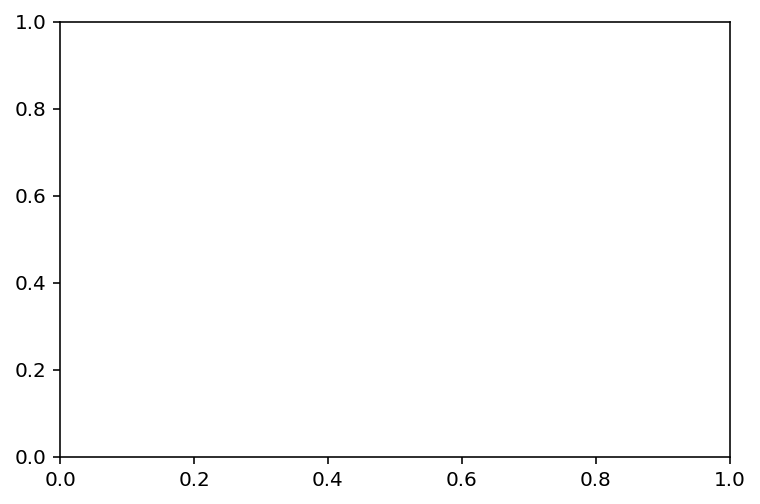

In [44]:
# sgd_clf.predict_proba(X_test)
# %pylab
# plt.clf()
# #plt.contour(y_test[:].values,y_test_pred[:],'ko')
# plt.show()